# Homework
1. Plot the edge detection picture, sharp image and soft image.(use lena.png)
2. Calculate the times of each word and each continues pair of word.(from high to low)
3. Plot the histogram of house price.
4. finish the linear algebra problems.

In [1]:
# Run this part first
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Text datasets
#!pip install beautifulsoup4
from bs4 import BeautifulSoup
import string
# For downloading and importing data
import os
import urllib
import tarfile
import string
import pandas as pd

### 1. Plot the edge detection picture, sharp image and soft image.(use lena.png)

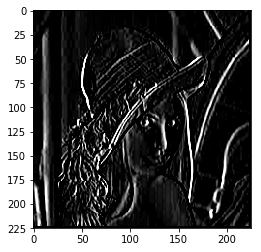

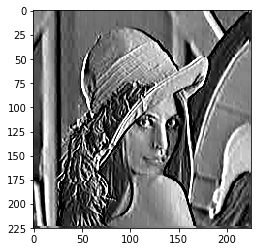

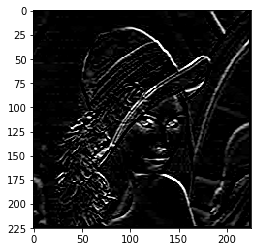

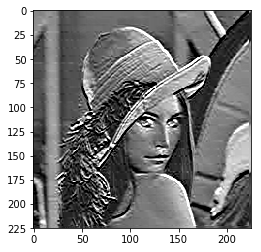

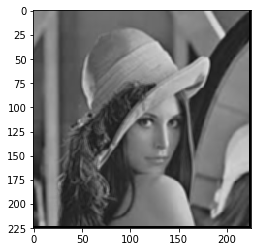

In [2]:
image = Image.open("example_pic/lena.png")
image2array = np.array(image)

x_osize, y_osize = np.shape(image2array)

filter_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter_y = np.transpose(filter_x)
filter_s = np.full((3,3), 1/9)

fil_x = np.reshape(filter_x, (9,1))
fil_y = np.reshape(filter_y, (9,1))
fil_s = np.reshape(filter_s, (9,1))

foo = np.vstack((np.zeros(x_osize), image2array))
foo = np.vstack((foo, (np.zeros(x_osize))))

x_size, y_size = np.shape(foo)

sizes = (1,x_size)
a = np.transpose(np.zeros(sizes))

foo = np.hstack((foo,a))
foo = np.hstack((a,foo))

x_size, y_size = np.shape(foo)
sizes = (x_osize, y_osize)

filters1 = np.zeros(sizes)
filters2 = np.zeros(sizes)
filters3 = np.zeros(sizes)

for i in range(x_size-4):
    for j in range(y_size-4):
        bar = np.reshape((image2array[range(0+i,3+i)])[:,range(0+j,3+j)], (1,9))
        filters1[i,j] = np.dot(bar, fil_x)
        filters2[i,j] = np.dot(bar, fil_y)
        filters3[i,j] = np.dot(bar, fil_s)


plt.imshow(Image.fromarray(filters1))
plt.figure()
plt.imshow(Image.fromarray(filters1 + image2array))
plt.figure()
plt.imshow(Image.fromarray(filters2))
plt.figure()
plt.imshow(Image.fromarray(filters2 + image2array))
plt.figure()
plt.imshow(Image.fromarray(filters3))
#array2image = Image.fromarray(image2array)
#plt.figure(num=6, figsize=(8, 5),)
#plt.imshow(array2image)

### 2. Calculate the times of each word and each pair of word (from high to low)

In [3]:
reuters_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/reuters21578-mld/reuters21578.tar.gz'
if not os.path.exists('reuters-data'):
    os.mkdir('reuters-data')
    urllib.request.urlretrieve(reuters_url, 'reuters-data/reuters.tar.gz')
    # Decompress data
    compressed = tarfile.open('reuters-data/reuters.tar.gz')
    compressed.extractall(path = 'reuters-data/')
    compressed.close()
    # List the uncompressed data
    os.listdir('reuters-data/')
    # Load in each data file (zfill pads out integers with leading zeros)
    text_data = []
    for index in range(22):
        filename = 'reuters-data/reut2-{0}.sgm'.format(str(index).zfill(3))
        with open(filename, 'r', encoding = 'utf-8', errors = 'ignore') as infile:
            text_data.append(infile.read())
        
        
# Separate each text file into articles
articles = []
for textfile in text_data:
    # Parse text as html using beautiful soup
    parsed_text = BeautifulSoup(textfile, 'html.parser')
    # Extract article between <BODY> and </BODY> and convert to standard text. Add to list of articles
    articles += [article.get_text() for article in parsed_text.find_all('body')]

articles = articles[:20]

In [4]:
hc = []

###########################################################################################
for arts in articles:
    arts = list(arts)
    for char in arts:
        if char not in string.ascii_letters:
            arts[arts.index(char)] = " "
        elif char in string.ascii_uppercase:
            arts[arts.index(char)] = arts[arts.index(char)].lower()
    arts = "".join(arts)
    arts = [a for a in arts.split(" ") if a != ""]
    hc += arts
###########################################################################################

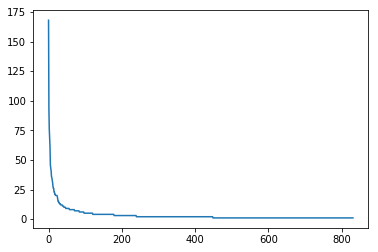

In [5]:
foos = {}
for p in hc:
    if p in foos:
        foos[p] += 1
    else:
        foos[p] = 1
item = list(foos.items())
item.sort(key=lambda s:s[1], reverse = True)

keyer = list(foos.values())
keyer.sort(reverse=True)

plt.plot(list(range(len(keyer))), keyer)
plt.show()

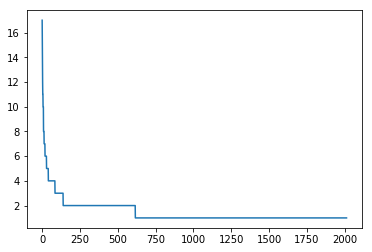

In [6]:
foos = {}

for p in range(len(hc)-1):
    if (hc[p],hc[p+1]) in foos:
        foos[(hc[p],hc[p+1])] += 1
    else:
        foos[(hc[p],hc[p+1])] = 1

item = list(foos.items())
item.sort(key=lambda s:s[1], reverse = True)

keyers= list(foos.values())
keyers.sort(reverse=True)

plt.plot(list(range(len(keyers))), keyers)
plt.show()

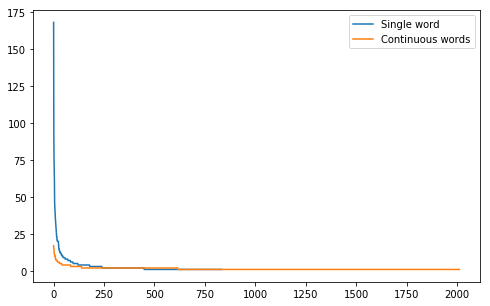

In [7]:
plt.figure(num=5, figsize=(8, 5),)
plt.plot(list(range(len(keyer))), keyer, label="Single word")
plt.plot(list(range(len(keyers))), keyers, label = "Continuous words")
plt.legend()

### 3. Plot the histogram of house price.

(array([  0.,   0.,   0.,   4.,   1.,   6.,  11.,  13.,  44.,  35.,  61.,
         87., 103., 124., 126.,  88.,  81., 102.,  78.,  61.,  50.,  45.,
         43.,  46.,  26.,  28.,  27.,  26.,  18.,  11.,  10.,  20.,  14.,
          8.,   7.,   4.,   4.,   8.,   6.,   6.,   3.,   3.,   3.,   3.,
          2.,   1.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
         80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
        160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
        240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000,
        320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000,
        400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000,
        480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000,
        560000, 570000, 

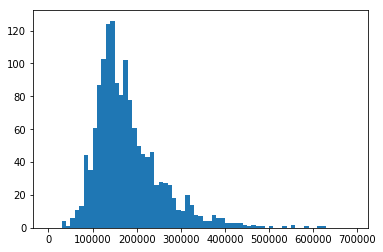

In [8]:
df = pd.read_csv("house_price.csv")
select_df = pd.DataFrame(df)
P = select_df["SalePrice"].values
plt.hist(P,bins=list(range(0,700000,10000)))

### 4. finish the linear algebra problems.

In [9]:
###########################################################################################
# part A contains no codes
###########################################################################################
# part B
x1 = [-3.58,-0.16,-18.50,14.77,13.68,-5.49,-2.11,-16.80,2.17,-4.49]
x2 = [-5.12,-13.39,-2.01,3.57,21.21,15.13,7.42,-2.89,-12.67,14.12]
y = [3.21,10.91,-10.59,12.67,1.22,-10.39,-3.13,-8.71,12.34,-9.07]

A = np.array(x1)
A = np.vstack((A,x2))
A = np.vstack((A,np.full((1,10),1)))
A = A.transpose()

b = np.array(y)
b = b.transpose()


X_star = np.dot(np.transpose(A),A)
X_star = np.linalg.inv(X_star)
X_star = np.dot(X_star, np.transpose(A))
X_star = np.dot(X_star,b)
print(X_star)

###########################################################################################
# part C
x = [11.63,-14.29,-2.92,12.24,-4.91,8.39,-12.43,1.89,-5.16,4.74]
y = [5.73,12.98,4.84,6.05,5.71,4.43,11.12,3.73,5.83,3.73]


A = np.array(x)
A = np.vstack((A**2,A))
A = np.vstack((A,np.full((1,10),1)))
A = A.transpose()

b = np.array(y)
b = b.transpose()


X_star = np.dot(np.transpose(A),A)
X_star = np.linalg.inv(X_star)
X_star = np.dot(X_star, np.transpose(A))
X_star = np.dot(X_star,b)
print(X_star)
###########################################################################################

[ 0.79947433 -0.5991446   3.00575171]
[ 0.02998194 -0.19994025  4.00162258]
